**Spark Installtion**

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


**Imports**

In [ ]:
import findspark
findspark.init()
import pyspark

from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.window import Window

from importlib import reload 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Spark Sesstion**

In [ ]:
def init_spark(app_name: str):
    spark = SparkSession.builder.appName(app_name).getOrCreate()
    sc = spark.sparkContext
    return spark, sc

In [ ]:
spark, sc = init_spark('proj')
spark

**Place Based Analysis**

In [ ]:
username = "arieln"
password = "Qwerty12!"
server_name = "jdbc:sqlserver://technionddscourse.database.windows.net:1433"
database_name = "arieln"
url = server_name + ";" + "databaseName=" + database_name + ";"
df = spark.read \
        .format("com.microsoft.sqlserver.jdbc.spark") \
        .option("url", url) \
        .option("dbtable", "spatialDF") \
        .option("user", username) \
        .option("password", password).load()
df.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
+-----------+--------+---------+------------------+-------------------+------------------+-------------+
|  StationId|latitude|longitude|           maxTemp|            minTemp|           avgPrcp|cluster_label|
+-----------+--------+---------+------------------+-------------------+------------------+-------------+
|GME00121990| 51.0892|  12.9342| 278.4731182795699| -41.03225806451613|16.225429896423684|            1|
|UKE00105897| 51.9589|   1.0267| 248.9777777777778| -9.466666666666667|17.059600733209773|            1|
|SPE00120467| 28.4775| -16.3292| 290.9732142857143|            94.9375| 12.00545496211742|            0|
|GME00132286| 54.0206|   9.9267|258.88659793814435|-34.329896907216494|19.285663460597025|            1|
|GME00131386| 52.3625|  12.3883|             284.5| -32.27450980392157| 14.10522783873727|            1|
|GME00102193| 54.5289|   9.54

-------------------------------    Germany    -------------------------------


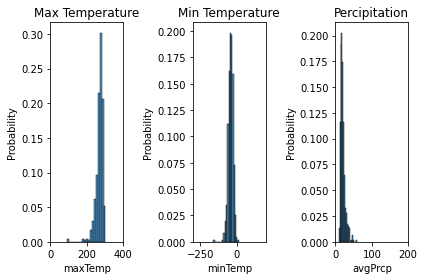

-------------------------------    Norway    -------------------------------


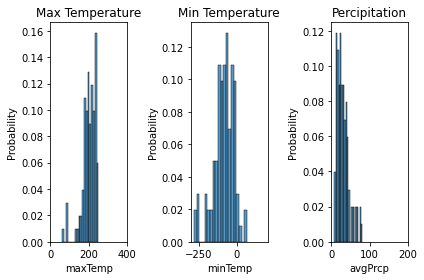

-------------------------------    Spain    -------------------------------


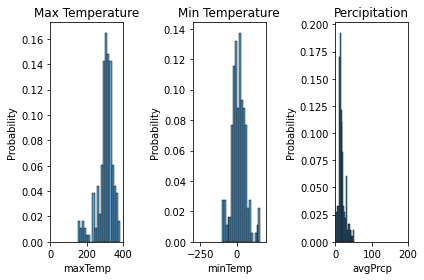

-------------------------------    United Kingdom    -------------------------------


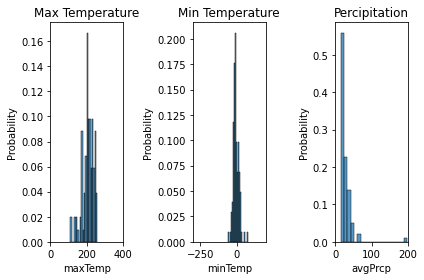

-------------------------------    France    -------------------------------


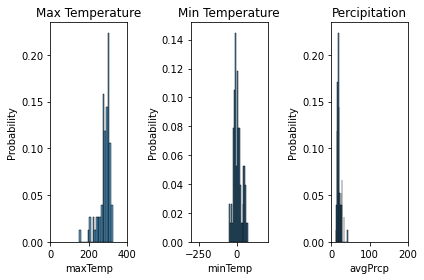

In [ ]:
countries = ['GM','NO','SP','UK','FR']
df = df.withColumn("country", F.col("StationId").substr(1, 2))
countries_dict = {}
countries = {}
countries['GM'] = 'Germany'
countries['NO'] = 'Norway'
countries['SP'] = 'Spain'
countries['UK'] = 'United Kingdom'
countries['FR'] = 'France'

for country in countries:
  countries_dict[country] = df[df["country"] == country]
for country in countries:
  print("-------------------------------    " + countries[country] + "    -------------------------------")
  fig, axes = plt.subplots(nrows=1, ncols=3)
  sns.histplot(x="maxTemp", bins = 20, data = countries_dict[country].select('maxTemp').toPandas(), ax=axes[0], stat='probability')
  axes[0].set_title("Max Temperature")
  axes[0].set_xlim(left=0, right=400)
  sns.histplot(x="minTemp", bins = 20, data = countries_dict[country].select('minTemp').toPandas(), ax=axes[1], stat='probability')
  axes[1].set_title("Min Temperature")
  axes[1].set_xlim(left=-300, right=200)
  sns.histplot(x="avgPrcp", bins = 20, data = countries_dict[country].select('avgPrcp').toPandas(), ax=axes[2], stat='probability')

  axes[2].set_title("Percipitation")
  axes[2].set_xlim(left=0, right=200)
  fig.tight_layout()
  plt.show()

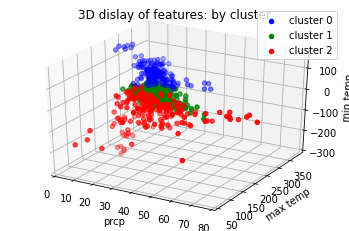

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ["b", "g", "r", "m", "k"]
pd_df = df.toPandas()
for i in range(3):
    ax.scatter(pd_df[pd_df['cluster_label'] == i].avgPrcp, pd_df[pd_df['cluster_label'] == i].maxTemp, 
               pd_df[pd_df['cluster_label'] == i].minTemp, c = colors[i], label = "cluster " + str(i))
ax.set_xlim(0,80)
ax.set_xlabel("prcp")
ax.set_ylabel("max temp")
ax.set_zlabel("min temp")
plt.legend()
plt.title("3D dislay of features: by cluster")
plt.show()

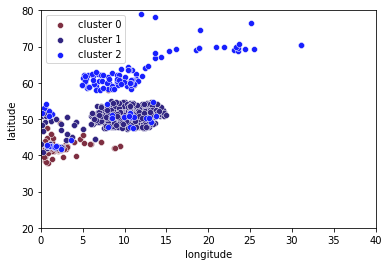

In [ ]:
colors = [[0.4940,0.1840, 0.2560], [0.1940, 0.1440, 0.5060], [0.0940, 0.1240, 0.9960]]
reload(plt)
plt.xlim(0, 40)
plt.ylim(20, 80)
for i in range(3):
  pd_cdf = pd_df[pd_df['cluster_label']==i]
  sns.scatterplot(x = pd_cdf['longitude'],y = pd_cdf['latitude'],color = colors[i],label = "cluster " + str(i) )
  plt.legend()

**Time Based Analisys**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = spark.read \
        .format("com.microsoft.sqlserver.jdbc.spark") \
        .option("url", url) \
        .option("dbtable", "timeDF") \
        .option("user", username) \
        .option("password", password).load()
df.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
+-----------+----------+-----+
|  StationId|      date|label|
+-----------+----------+-----+
|SPE00156423|2016-01-03|    0|
|SPE00120125|2016-01-04|  408|
|SPE00120170|2016-01-05|   48|
|SPE00156585|2016-01-06|    0|
|SPE00119918|2016-01-10|    8|
|SPE00156369|2016-01-10|    0|
|SPE00156414|2016-01-10|   34|
|SPE00156648|2016-01-10|    0|
|SPE00120017|2016-01-11|   48|
|SPE00156018|2016-01-13|    0|
|SPE00156288|2016-01-13|    0|
|SPW00013024|2016-01-13|    0|
|SPE00156594|2016-01-15|    0|
|SPE00156513|2016-01-17|    0|
|SPE00156000|2016-01-18|    0|
|SPE00156189|2016-01-19|    0|
|SP000007038|2016-01-20|    0|
|SPE00156549|2016-01-22|    0|
|SPE00156162|2016-01-23|    0|
|SPE00156621|2016-01-24|    0|
+-----------+----------+-----+
only showing top 20 rows



Month Based

In [ ]:
mount_agg_df = df.withColumn('month', F.split(df.date, '-')[1].cast('integer'))
mount_agg_df = mount_agg_df.withColumn('year', F.split(mount_agg_df['date'], '-')[0].cast('integer')).drop('date')
mount_agg_df = mount_agg_df.groupby('StationId', 'month', 'year').sum('label')
mount_agg_df = mount_agg_df.groupby('StationId', 'month').mean('sum(label)')
mount_agg_df = mount_agg_df.withColumn('PRCP', mount_agg_df['avg(sum(label))']).drop('avg(sum(label))')
mount_agg_df.show()

+-----------+-----+------+
|  StationId|month|  PRCP|
+-----------+-----+------+
|GME00115771|    8|1298.4|
|GME00124810|    8|1333.6|
|GME00121750|    2|1086.8|
|NOE00110554|    8|3561.2|
|SPE00156342|    4| 666.2|
|FR000007130|   12|1446.8|
|NOE00134718|   10| 841.0|
|GME00131530|    8| 911.2|
|NOE00109876|    1| 657.0|
|GME00125146|    1|1452.0|
|NO000001026|   10|1630.0|
|GM000003038|    4| 653.6|
|GME00121654|   10|1322.4|
|NOE00134574|    3| 400.4|
|NOE00133254|    7| 835.4|
|GME00132154|    3| 837.6|
|GME00123130|    2|1234.0|
|NOE00111004|    7| 809.6|
|GMM00010480|    1| 910.4|
|GME00129190|    6|1170.0|
+-----------+-----+------+
only showing top 20 rows



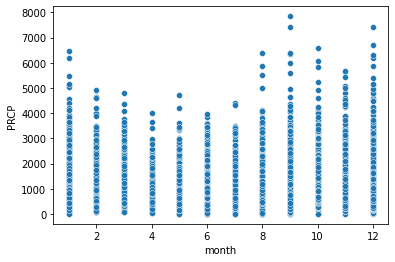

In [ ]:
pd_df = mount_agg_df.toPandas()
sns.scatterplot(x = pd_df['month'], y = pd_df['PRCP'])
plt.show()

In [ ]:
mount_agg_df = mount_agg_df.drop('StationId')
mount_agg_df = mount_agg_df.groupBy("month").agg(F.min("PRCP"), F.max('PRCP'), F.var_pop("PRCP"))
mount_agg_df = mount_agg_df.withColumn('min_PRCP', mount_agg_df['min(PRCP)']).drop('min(PRCP)')
mount_agg_df = mount_agg_df.withColumn('max_PRCP', mount_agg_df['max(PRCP)']).drop('max(PRCP)')
mount_agg_df = mount_agg_df.withColumn('var_PRCP', mount_agg_df['var_pop(PRCP)']).drop('var_pop(PRCP)')
mount_agg_df = mount_agg_df.withColumn('range_PRCP', mount_agg_df.max_PRCP - mount_agg_df.min_PRCP)
mount_agg_df.show()

+-----+--------+--------+------------------+----------+
|month|min_PRCP|max_PRCP|          var_PRCP|range_PRCP|
+-----+--------+--------+------------------+----------+
|   12|     3.0|  7406.8| 823054.7028707761|    7403.8|
|    1|     8.8|  6458.0| 595233.2888347387|    6449.2|
|    6|     0.4|  3980.8| 341531.8432363311|    3980.4|
|    3|    78.0|  4798.8|323520.29335984966|    4720.8|
|    5|     0.0|  4702.4| 316599.0529666013|    4702.4|
|    9|     0.0|  7847.2|  663580.216593518|    7847.2|
|    4|    22.0|  3992.0|175490.68071661235|    3970.0|
|    8|     0.0|  6398.8| 525633.3475020734|    6398.8|
|    7|     0.0|  4408.0| 362539.1955357152|    4408.0|
|   10|     0.0|  6577.2|508345.22355317156|    6577.2|
|   11|     0.0|  5657.6| 540652.4992342772|    5657.6|
|    2|    57.2|  4938.4|414570.52899540437|    4881.2|
+-----+--------+--------+------------------+----------+



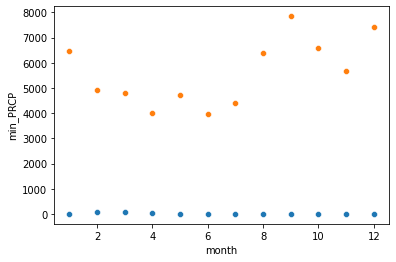

In [ ]:
pd_month_df = mount_agg_df.toPandas()
sns.scatterplot(x = pd_month_df['month'], y = pd_month_df['min_PRCP'])
sns.scatterplot(x = pd_month_df['month'], y = pd_month_df['max_PRCP'])
plt.show()

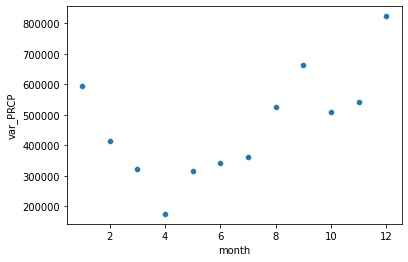

In [ ]:
sns.scatterplot(x = pd_month_df['month'], y = pd_month_df['var_PRCP'])
plt.show()

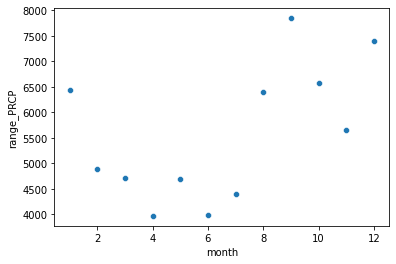

In [ ]:
sns.scatterplot(x = pd_month_df['month'], y = pd_month_df['range_PRCP'])
plt.show()

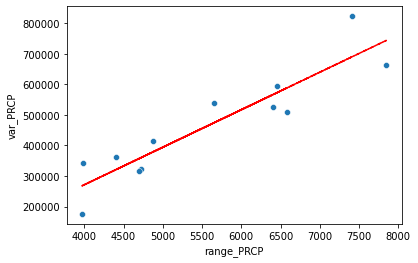

In [ ]:
sns.scatterplot(x = pd_month_df['range_PRCP'], y = pd_month_df['var_PRCP'])
x = pd_month_df['range_PRCP']
y = pd_month_df['var_PRCP']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

**Time - Place Based Analisys**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

time_df = spark.read \
        .format("com.microsoft.sqlserver.jdbc.spark") \
        .option("url", url) \
        .option("dbtable", "timeDF") \
        .option("user", username) \
        .option("password", password).load()
time_df.show()

place_df = spark.read \
        .format("com.microsoft.sqlserver.jdbc.spark") \
        .option("url", url) \
        .option("dbtable", "spatialDF") \
        .option("user", username) \
        .option("password", password).load()
place_df.show()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
+-----------+----------+-----+
|  StationId|      date|label|
+-----------+----------+-----+
|SPE00156423|2016-01-03|    0|
|SPE00120125|2016-01-04|  408|
|SPE00120170|2016-01-05|   48|
|SPE00156585|2016-01-06|    0|
|SPE00119918|2016-01-10|    8|
|SPE00156369|2016-01-10|    0|
|SPE00156414|2016-01-10|   34|
|SPE00156648|2016-01-10|    0|
|SPE00120017|2016-01-11|   48|
|SPE00156018|2016-01-13|    0|
|SPE00156288|2016-01-13|    0|
|SPW00013024|2016-01-13|    0|
|SPE00156594|2016-01-15|    0|
|SPE00156513|2016-01-17|    0|
|SPE00156000|2016-01-18|    0|
|SPE00156189|2016-01-19|    0|
|SP000007038|2016-01-20|    0|
|SPE00156549|2016-01-22|    0|
|SPE00156162|2016-01-23|    0|
|SPE00156621|2016-01-24|    0|
+-----------+----------+-----+
only showing top 20 rows

+-----------+--------+---------+------------------+-------------------+------------------+---------

In [ ]:
time_place_df = time_df.join(place_df.select('StationId', 'cluster_label'), on = 'StationId')
time_place_df.show()

+-----------+----------+-----+-------------+
|  StationId|      date|label|cluster_label|
+-----------+----------+-----+-------------+
|SPE00156423|2016-01-03|    0|            0|
|SPE00120125|2016-01-04|  408|            1|
|SPE00120170|2016-01-05|   48|            0|
|SPE00156585|2016-01-06|    0|            0|
|SPE00119918|2016-01-10|    8|            0|
|SPE00156369|2016-01-10|    0|            0|
|SPE00156414|2016-01-10|   34|            0|
|SPE00156648|2016-01-10|    0|            0|
|SPE00120017|2016-01-11|   48|            0|
|SPE00156018|2016-01-13|    0|            2|
|SPE00156288|2016-01-13|    0|            0|
|SPW00013024|2016-01-13|    0|            0|
|SPE00156594|2016-01-15|    0|            0|
|SPE00156513|2016-01-17|    0|            1|
|SPE00156000|2016-01-18|    0|            0|
|SPE00156189|2016-01-19|    0|            0|
|SP000007038|2016-01-20|    0|            0|
|SPE00156549|2016-01-22|    0|            1|
|SPE00156162|2016-01-23|    0|            2|
|SPE001566

In [ ]:

time_place_df = time_place_df.withColumn('date', F.substring(time_place_df.date, 0, 7))
time_place_df = time_place_df.withColumn('date', 10*F.split(time_place_df.date, '-')[0] + (10/13)*F.split(time_place_df.date, '-')[1])
time_place_df = time_place_df.groupby('StationId', 'date', 'cluster_label').sum('label')
time_place_df = time_place_df.withColumn('sum_PRCP', time_place_df['sum(label)']).drop('sum(label)')
time_place_df.show()

+-----------+------------------+-------------+--------+
|  StationId|              date|cluster_label|sum_PRCP|
+-----------+------------------+-------------+--------+
|SPE00156018| 20162.30769230769|            2|     516|
|SPE00156351| 20160.76923076923|            1|     142|
|SPE00120089| 20162.30769230769|            0|     320|
|SPE00155964| 20161.53846153846|            0|     159|
|SPE00120035|20163.846153846152|            0|     784|
|SPE00120467| 20162.30769230769|            0|    1296|
|SPE00120395|20165.384615384617|            0|     128|
|SPE00120287| 20162.30769230769|            0|     780|
|SPE00156090|20163.076923076922|            0|     598|
|SPE00156495|20166.923076923078|            2|    1552|
|SPE00119855|20164.615384615383|            0|      20|
|SPE00120062| 20168.46153846154|            0|    1644|
|SPE00120170|20175.384615384617|            0|      20|
|SPE00120530| 20167.69230769231|            0|     732|
|SPE00119936| 20170.76923076923|            0|  

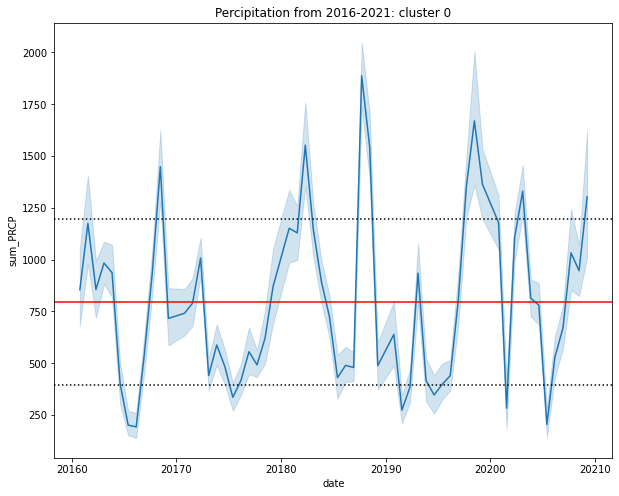

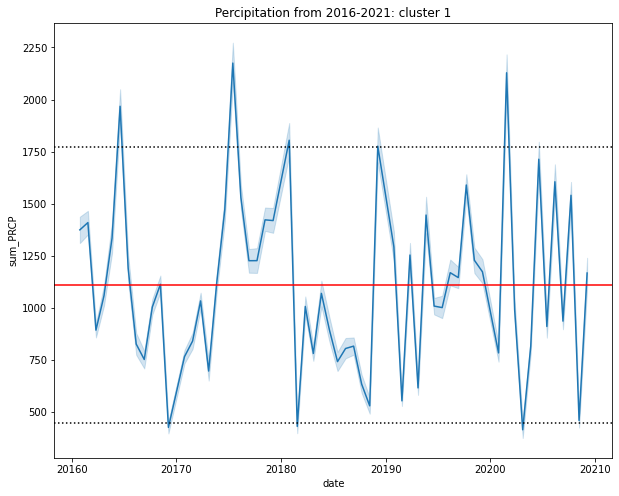

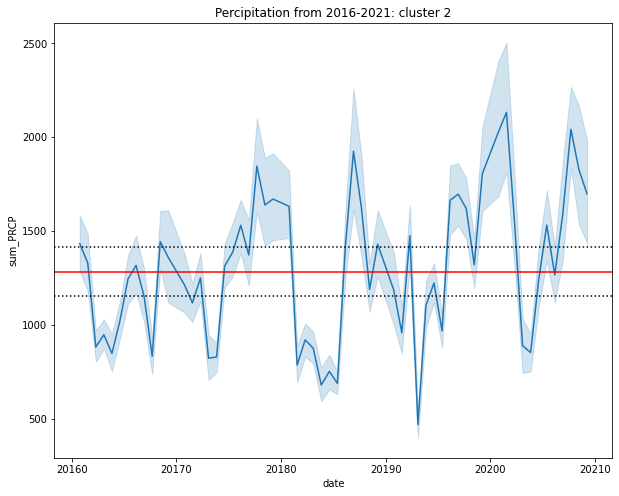

In [ ]:
prcp_ts = time_place_df.toPandas()
for k in range(3):
  fig, ax1 = plt.subplots(1, figsize=(10,8))
  sns.lineplot(x="date", y="sum_PRCP", data = prcp_ts[prcp_ts['cluster_label']==k], ax=ax1)
  prcp_mean = prcp_ts[prcp_ts['cluster_label']==k]["sum_PRCP"].mean()
  prcp_std = prcp_ts[prcp_ts['cluster_label']==k]["sum_PRCP"].std()
  ax1.axhline(y = prcp_mean, color = 'r', linestyle = '-', label="prcp_mean")
  ax1.axhline(y = prcp_mean + 2*abs(prcp_std - prcp_mean), color = 'k', linestyle = 'dotted', label='one standard deviation from mean')
  ax1.axhline(y = prcp_mean - 2*abs(prcp_std - prcp_mean), color = 'k', linestyle = 'dotted')
  ax1.set_title("Percipitation from 2016-2021: cluster " + str(k))

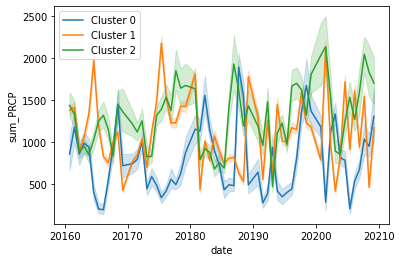

In [ ]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
for k in range(3):
  sns.lineplot(x="date", y="sum_PRCP", data = prcp_ts[prcp_ts['cluster_label']==k], label = labels[k])
plt.legend()  
plt.show()